In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_price = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
df_financial = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')
df_stocklist = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/stock_list.csv')

/var/folders/1k/wj0bvnz165sfyvwsqlfxwfmw6bk41g/T/ipykernel_6812/1116028146.py:2: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_financial = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')


In [3]:
df_price.Close = df_price.Close.ffill()

In [5]:
sns.set()

<AxesSubplot:xlabel='Date', ylabel='Close'>

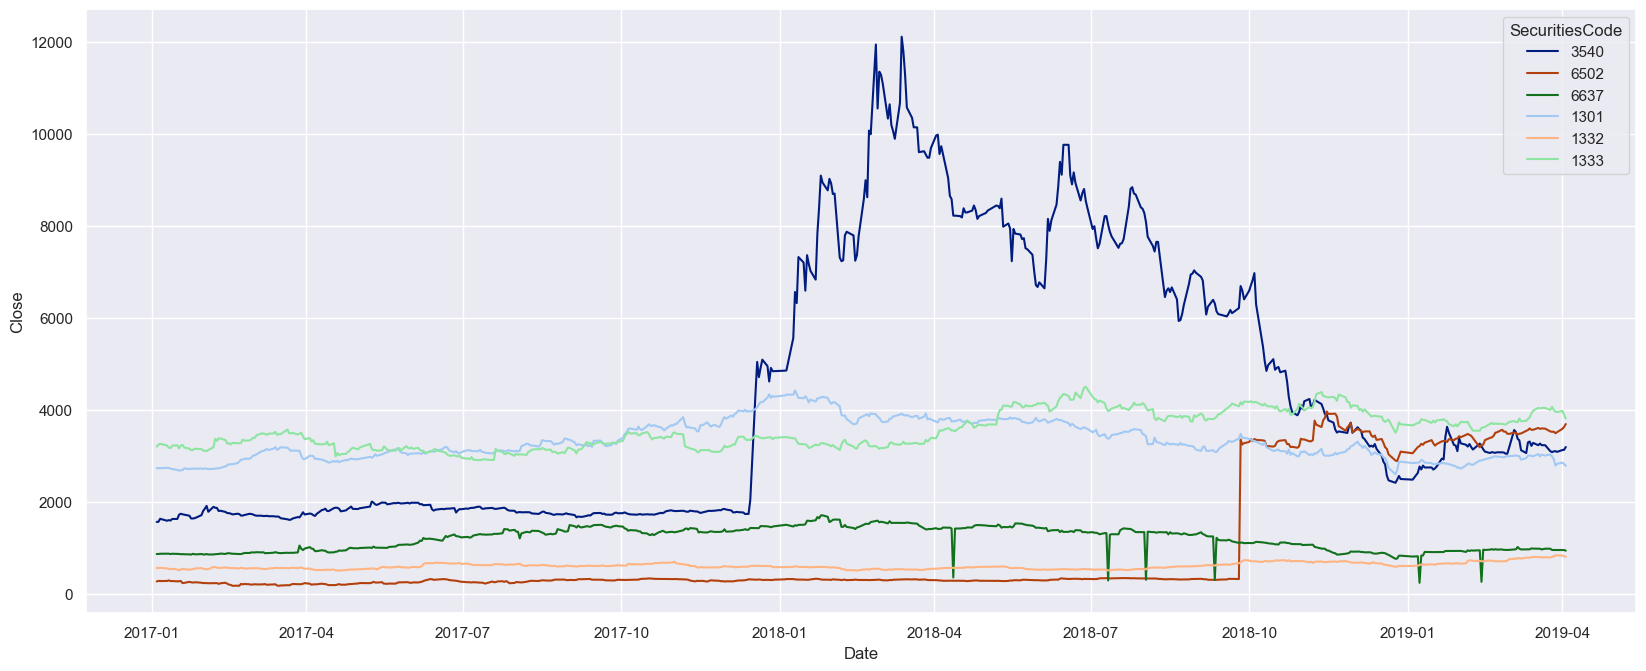

In [11]:
delist = df_price[df_price.SupervisionFlag == True].SecuritiesCode.unique()[:3]
normal = df_price[df_price.SupervisionFlag == False].SecuritiesCode.unique()[:3]
df_delist = df_price[df_price.SecuritiesCode.isin(delist)]
df_normal = df_price[df_price.SecuritiesCode.isin(normal)]

df = pd.concat([df_delist, df_normal], axis=0)
df.Date = pd.to_datetime(df.Date)

fig = plt.figure(figsize=(20, 8), dpi=100)
sns.lineplot(data=df[df.SecuritiesCode.isin(delist)], x='Date', y='Close', hue='SecuritiesCode', palette='dark')
sns.lineplot(data=df[df.SecuritiesCode.isin(normal)], x='Date', y='Close', hue='SecuritiesCode', palette='pastel')

In [14]:
df[df.SupervisionFlag == True]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
92438,20170315_6502,2017-03-15,6502,199.9,205.5,186.5,189.5,379973000,1.0,NaN,True,0.035403
94305,20170316_6502,2017-03-16,6502,188.6,192.2,181.6,183.6,211415000,1.0,NaN,True,0.033666
96172,20170317_6502,2017-03-17,6502,198.0,199.0,186.3,190.1,237833000,1.0,NaN,True,-0.012723
98042,20170321_6502,2017-03-21,6502,187.0,197.1,186.5,196.5,124884000,1.0,NaN,True,0.068557
99914,20170322_6502,2017-03-22,6502,194.0,195.7,192.4,194.0,54887000,1.0,NaN,True,0.075736
...,...,...,...,...,...,...,...,...,...,...,...,...
1039966,20190328_3540,2019-03-28,3540,3075.0,3155.0,3060.0,3110.0,4800,1.0,NaN,True,0.012924
1041904,20190329_3540,2019-03-29,3540,3110.0,3140.0,3050.0,3095.0,8200,1.0,NaN,True,0.001595
1043842,20190401_3540,2019-04-01,3540,3165.0,3165.0,3120.0,3135.0,3700,1.0,NaN,True,0.019108
1045780,20190402_3540,2019-04-02,3540,3145.0,3160.0,3070.0,3140.0,6400,1.0,NaN,True,0.003125
